# Closest Points on curves

Finds the points(2) on two curves that are the closest to each other in a given range. i.e. minimize the euclidian distance between each other. 

* Last revised 8-Nov-2022 by Leo Deer (deer.279@osu.edu).

### Import packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

### Define our curves and range (You input here)

In [7]:
# Make two parametric curves of 2 spatial dimention

def g(t):
    x = t  # Keep this as t if you want only y to be the dependent variable
    y = (t-1)**2. * (t+1.3)**2. + 0.5
    return x, y

def f(t):
    x = t  # Keep this as t if you want only y to be the dependent variable
    y = np.cos(np.pi*t)
    return x, y


# Set the range of t values to look for the set of closest points.

t_min = -2.  # This is the min t value in our range.
t_max = 2.  # This is the max t value in our range.
t_step = 0.01   # This is the precision in the x-value we want.
t_vals = np.arange(t_min,t_max + t_step,t_step)

<function matplotlib.pyplot.show(close=None, block=None)>

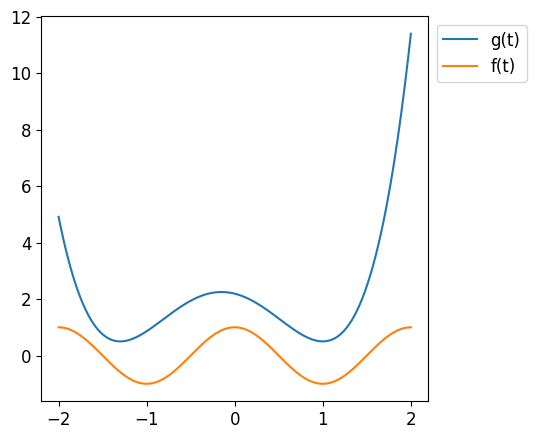

In [8]:
# Now we will plot the two curves

fig = plt.figure(figsize=(5,5))
plt.plot(g(t_vals)[0], g(t_vals)[1])
plt.plot(f(t_vals)[0], f(t_vals)[1])
plt.legend(["g(t)" , "f(t)"], bbox_to_anchor = (1 , 1))
plt.show

### Calculations

In [9]:
# We'll make a class to find the points of minimum distance

class Minimum():
    """
    Minimum class find the set of two points closest two each other on two curves
     
    Parameters
    ----------
    g : Tuple
        The first curve
    f : Tuple
        The second curve
    t : Float 
        The set of time values our parametric curves are evaluated at

    Methods
    -------
    norm(tg, tf)
        Returns to equation of the euclidean norm we will be using to calculate
        the distance between points in the chosen dimention of space the user chose.
    
    dist_matrix
        Finds a matrix of distance values between all possible points on our two curves.
        
    points
        Finds the set of point pairs that minimize the distance between the curves
    """
    def __init__(self, g, f, t):
        self.g = g
        self.f = f
        self.t = t
        
    def norm(self, tg, tf):
        """
        Returns to equation of the euclidean norm we will be using to calculate
        the distance between points in the chosen dimention of space the user chose.
        
        Parameters
        ----------
        tg : float
            The independent variable for the curve "g"

        tf : float
            The independent variable for the curve "f"
            
        Returns
        -------
        norm : the equation of the norm
        """
        norm = 0
        for i in range(len(self.g(0))):
            norm = norm + (self.g(tg)[i]-self.f(tf)[i])**2 
        return norm
    
    def dist_matrix(self):
        """
        This function calculates a matrix of distance values between
        every point on curve f and curve g
            
        Returns
        -------
        distance : Float
                The matric of distance values
        """
        distance = [[self.norm(tg, tf) for tg in self.t] for tf in self.t]
        
        return distance
    
    def points(self):
        """
        Finds the set of point pairs that minimize the distance between the curves
        
        Returns
        -------
        min_val : Float
                The square of the distance between the closest points
        xg_min : Float
                The x-coordinate of the points on the "g" curve
        yg_min : Float
                The y-coordinate of the points on the "g" curve
        xf_min : Float
                The x-coordinate of the points on the "f" curve
        yf_min : Float
                The y-coordinate of the points on the "f" curve
        """
        distance = self.dist_matrix()
        min_val = []
        min_val.append(distance[0][0])
        tg_min = []
        tg_min.append(self.t[0])
        tf_min = []
        tf_min.append(self.t[0])
        for tg in range(len(self.t)):
            for tf in range(len(self.t)):
                if distance[tf][tg] == min_val[0]:
                    min_val.append(distance[tf][tg])
                    tg_min.append(self.t[tg])
                    tf_min.append(self.t[tf])
                if distance[tf][tg] < min_val[0]:
                    min_val[0] = distance[tf][tg]
                    tg_min[0] = self.t[tg]
                    tf_min[0] = self.t[tf] 
                    for i in range(len(min_val)): 
                        if min_val[i] > min_val[0]:
                            for i in range(len(min_val)):
                                min_val.pop(i-1)
                                tg_min.pop(i-1)
                                tf_min.pop(i-1)
                            min_val.append(distance[tf][tg])
                            tg_min.append(self.t[tg])
                            tf_min.append(self.t[tf])
                            break
        xg_min = []
        yg_min = []
        xf_min = []
        yf_min = []
        for i in range(len(min_val)):
            xg_min.append(self.g(tg_min[i])[0])
            yg_min.append(self.g(tg_min[i])[1])
            xf_min.append(self.f(tf_min[i])[0])
            yf_min.append(self.f(tf_min[i])[1])
        return min_val, xg_min, yg_min, xf_min, yf_min

In [10]:
# Now find our points
m1 = Minimum(g=g, f=f, t=t_vals)
min_val, xg, yg, xf, yf = m1.points()

### Results

The set of point pairs closest to each other:
For g, (x,y) = (-1.4799999999999995,0.6992729599999988)
For f, (x,y) = (-1.7099999999999997,0.6129070536529755)
With a distance 0.24568082908347347


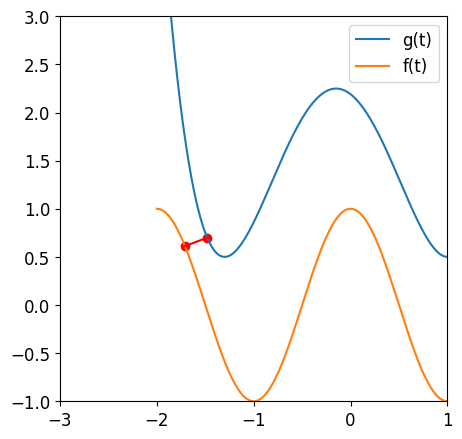

In [13]:
#Now we will plot the two curves with the point pairs

fig = plt.figure(figsize=(5,5))                
plt.plot(g(t_vals)[0], g(t_vals)[1])
plt.plot(f(t_vals)[0], f(t_vals)[1])
for i in range(len(min_val)): 
    plt.plot([xf[i], xg[i]],[yf[i], yg[i]],color='red')
    plt.scatter([xf[i], xg[i]],[yf[i], yg[i]],color='red')
plt.legend(["g(t)" , "f(t)"], bbox_to_anchor = (1 , 1))
plt.xlim(-3,1)
plt.ylim(-1,3)
plt.show


#Print the points

print("The set of point pairs closest to each other:")
for i in range(len(min_val)):
    print("For g, (x,y) = (" + str(xg[i]) +"," + str(yg[i]) + ")")
    print("For f, (x,y) = (" + str(xf[i]) +"," + str(yf[i]) + ")")
    print("With a distance " + str(min_val[i]**0.5))